In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
x = np.arange(-5, 5, 0.1)
y = 100 * np.sin(x) + np.random.rand(100) * 10


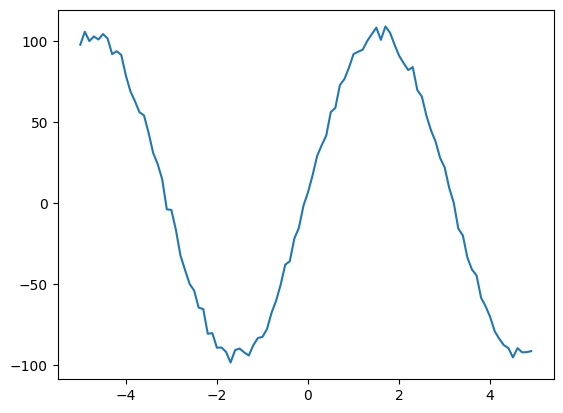

In [3]:
fig, ax = plt.subplots()
ax.plot(x, y)


In [4]:
def cost_wb(w, b, X, y):
    m = X.shape[0]
    f_wb = np.matmul(X, w.T) + b
    cost = np.sum((f_wb.T - y) ** 2)
    cost /= 2*m

    return cost


In [5]:
def gradient(w, b, X, y):
    d_dw = np.sum((X @ w.T + b - y).reshape(-1, 1) * X, axis=0)
    d_db = (X @ w.T + b - y).sum() / X.shape[0]

    d_dw /= X.shape[0]

    return d_dw, d_db


In [6]:
X = np.c_[x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, x**9]


for j in range(X.shape[1]):
    X[:, j] = (X[:, j] - X[:, j].min()) / (X[:, j].max() - X[:, j].min())


def fit(X, y, alpha, epochs):
    np.random.seed(3)
    w = np.random.rand(X.shape[1]) / 1e6
    b = np.random.rand() / 1e6

    for i in range(epochs):
        d_dw, d_db = gradient(w, b, X, y)

        w -= alpha * d_dw
        b -= alpha * d_db

        if i % 1000 == 0:
            print(cost_wb(w, b, X, y))

    return w, b


In [7]:
w, b = fit(X, y, 0.7, 10000)


2577.028128352843
553.0107848042899
286.07363306825704
196.50989963391555
164.3384127228032
150.9206030989987
143.76081096818604
138.78518637538102
134.6450431381485
130.88096838985436


In [8]:
w, b


(array([  680.82784619,     6.51709783, -1557.75727395,   -25.90596869,
         -201.27395834,   -12.95230641,   410.34508017,    46.32024225,
          548.67856069]),
 50.59503163973469)

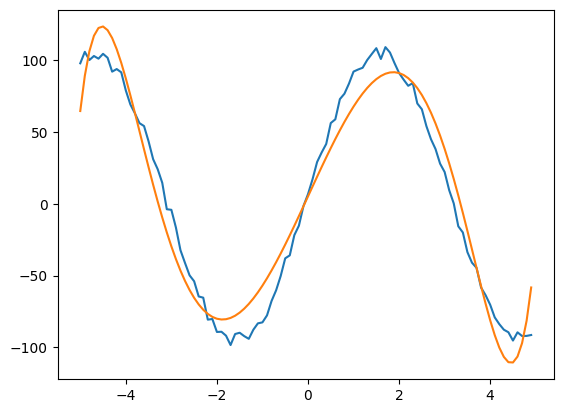

In [9]:
f_wb = np.matmul(X, w.T) + b

fig, ax = plt.subplots()
ax.plot(x, y)
ax.plot(x, f_wb)
